In [1]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f271870f34c045bf8abb7cbb26760e7c')

In [5]:
imagesPath = Path('images')
imagesPath.mkdir(exist_ok=True)

In [6]:
# Download Bigglesworth images
bigglesworthPath = imagesPath/'bigglesworth'
bigglesworthPath.mkdir(exist_ok=True)
results = search_images_bing(key, 'mr bigglesworth')
download_images(bigglesworthPath, urls=results.attrgot('contentUrl'))

In [7]:
# Download the Gidget images
gidgetPath = imagesPath/'gidget'
gidgetPath.mkdir(exist_ok=True)
results = search_images_bing(key, 'taco bell chihuahua')
download_images(gidgetPath, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(imagesPath)
fns

(#852) [Path('images/gidget/ee989430-93b5-4c6b-8e31-6a5c3da0e837.jpg'),Path('images/gidget/d61948d8-f018-4820-ae02-2c77fae1b7f9.jpg'),Path('images/gidget/5bf8376a-b934-4b16-b649-63670b753ee9.jpg'),Path('images/gidget/6b7df832-e8a2-46f3-b29b-33fda8e1043f.jpg'),Path('images/gidget/f604986f-afd5-43e0-b3f7-3be551663059.jpg'),Path('images/gidget/01ffd6a0-1310-4490-acc6-8f3aeff1355f.jpg'),Path('images/gidget/93510015-5440-4209-bb47-9d0369ac039e.jpg'),Path('images/gidget/27a855d1-22a8-4133-9563-da9c312dd491.jpg'),Path('images/gidget/fc3b376a-f16c-4237-8386-5a26d8ef55c3.jpg'),Path('images/gidget/a1dd9e2f-9df8-41a4-a458-bfc101f06802.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#12) [Path('images/gidget/a5800a5a-0dd6-4854-8fca-cb78efd773a0.jpg'),Path('images/gidget/aa078f2f-5a60-4709-bdeb-3b7e52fefc11.jpg'),Path('images/gidget/dfc3399f-4edf-4440-bfd8-9f5273f3c34b.jpg'),Path('images/gidget/65da4d03-6efa-40a2-a655-b66b095e4b15.jpg'),Path('images/gidget/60673a48-266d-4ec1-99b3-9a9e98a430f9.jpg'),Path('images/gidget/11be048f-fea0-4ef7-9bfb-2102fdc4e37a.gif'),Path('images/gidget/ace0b1a1-4077-421d-870d-f55d74ca04f1.jpg'),Path('images/bigglesworth/618e736d-ce51-4734-b887-557734708553.jpg'),Path('images/bigglesworth/06342ea8-353a-43b0-9aa6-04980c1f1973.jpg'),Path('images/bigglesworth/438e88b6-492a-4873-b10f-807ab7199e15.jpg')...]

In [10]:
failed.map(Path.unlink)

(#12) [None,None,None,None,None,None,None,None,None,None...]

In [11]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
data_loaders = data_block.dataloaders(imagesPath)

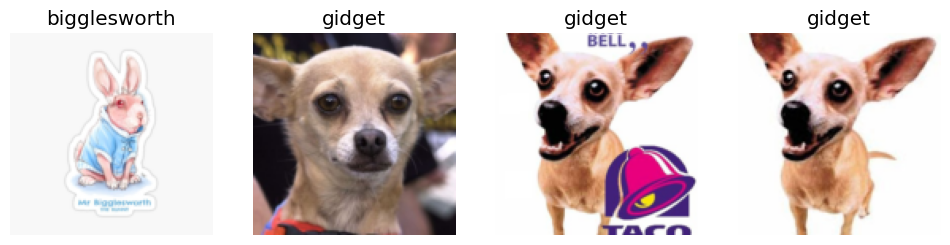

In [13]:
data_loaders.valid.show_batch(max_n=4, nrows=1)

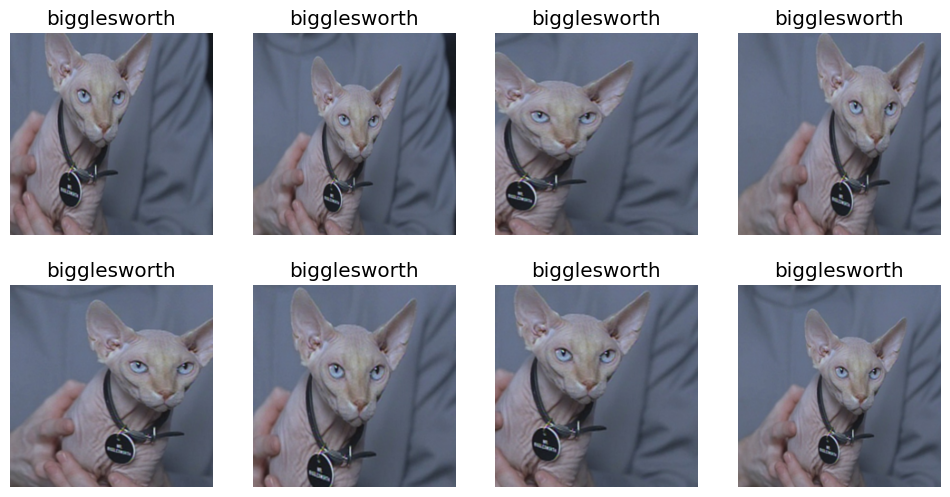

In [17]:
data_block = data_block.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
data_loaders = data_block.dataloaders(imagesPath)
data_loaders.train.show_batch(max_n=8, nrows=2, unique=True)

In [18]:
learn = vision_learner(data_loaders, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.529974,0.140415,0.041667,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.074923,0.033917,0.011905,00:08
1,0.059585,0.011478,0.000000,00:08
2,0.039058,0.001547,0.000000,00:08
3,0.028202,0.001594,0.000000,00:08


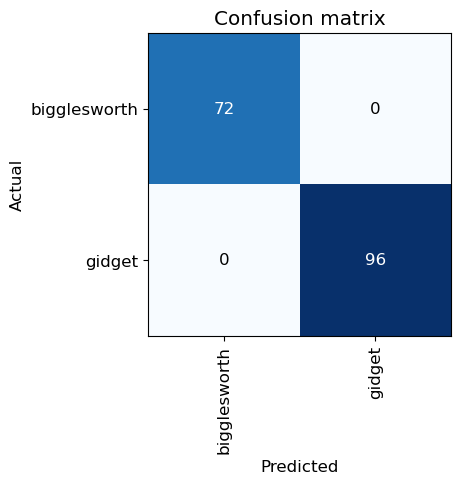

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

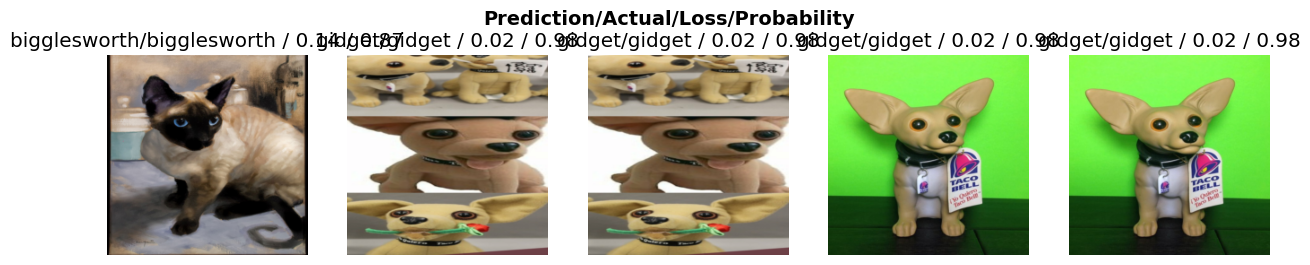

In [20]:
interp.plot_top_losses(5, nrows=1)